#Importing libraries

In [ ]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
import pickle


#Getting Data from Kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats

chmod: cannot access '/kaggle/kaggle.json': No such file or directory
 97% 790M/812M [00:03<00:00, 213MB/s]
100% 812M/812M [00:03<00:00, 272MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

#Data separation

##Making sure the data is equaly distibuted between the classes

In [ ]:
train_dir = '/content/train'
dog_files, cat_files = 0 , 0
for f in os.listdir(train_dir):
   if f.startswith('dog'):
     dog_files += 1
   else :
     cat_files += 1

print(f"There are {dog_files} files in the train folder that start with 'dog'.")
print(f"There are {cat_files} files in the train folder that start with 'cat'.")

There are 12500 files in the train folder that start with 'dog'.
There are 12500 files in the train folder that start with 'cat'.


##Splitting the data by class

In [ ]:
#Dividing the data between cats and dogs images in two different folders
!mkdir cat
!mkdir dog

for file in os.listdir(train_dir):
  if file.startswith('cat'):
    shutil.move(os.path.join(train_dir, file), os.path.join('/content/cat', file))
  if file.startswith('dog'):
    shutil.move(os.path.join(train_dir, file), os.path.join('/content/dog', file))



In [ ]:
len(os.listdir('/content/train'))

0

In [ ]:
shutil.rmtree('/content/train')

##Splitting the data for train-validate-test

In [ ]:
!mkdir -p my_data/train/cat
!mkdir -p my_data/train/dog
!mkdir -p my_data/val/cat
!mkdir -p my_data/val/dog
!mkdir -p my_data/test/cat
!mkdir -p my_data/test/dog

In [ ]:
classes = ['cat', 'dog']
parts = os.listdir('/content/my_data')

#coefficients to determine the amount of data for each part
coeffs = {'train':0.6, 'val':0.2, 'test':0.2}

for p in parts:
  for c in classes:
    for i in range(int(coeffs[p]*12500)):
      shutil.copy(os.path.join(f'/content/{c}',os.listdir(f'/content/{c}')[i]) , f'/content/my_data/{p}/{c}')




In [ ]:
training_path = '/content/my_data/train'
validation_path = '/content/my_data/val'
testing_path  = '/content/my_data/test'

In [ ]:
tr_0 = os.listdir(os.path.join(training_path,'cat'))
print(f'In our training directory : we have {len(tr_0)} cat images ,')

tr_1 = os.listdir(os.path.join(training_path,'dog'))
print(f'                             and {len(tr_1)}  dog images.')

In our training directory : we have 7500 cat images ,
                             and 7500  dog images.


In [ ]:
va_0 = os.listdir(os.path.join(validation_path,'cat'))
print(f'In our validation directory : we have {len(va_0)} cat images ,')

va_1 = os.listdir(os.path.join(validation_path,'dog'))
print(f'                             and {len(va_1)}  dog images.')

In our validation directory : we have 2500 cat images ,
                             and 2500  dog images.


In [ ]:
te_0 = os.listdir(os.path.join(testing_path,'cat'))
print(f'In our testing directory : we have {len(te_0)} cat images  ,')

te_1 = os.listdir(os.path.join(testing_path,'dog'))
print(f'                             and {len(te_1)}  dog iamges.')

In our testing directory : we have 2500 cat images  ,
                             and 2500  dog iamges.


##Showing some imgs

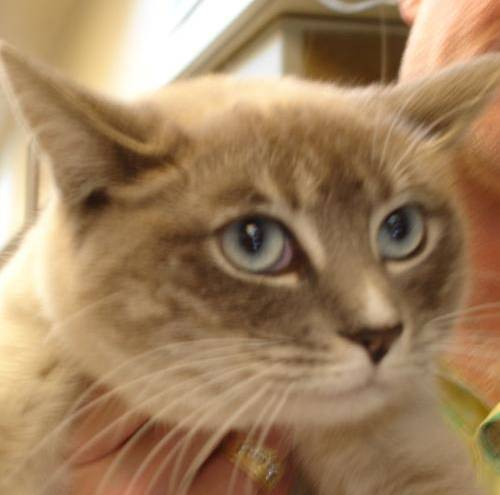

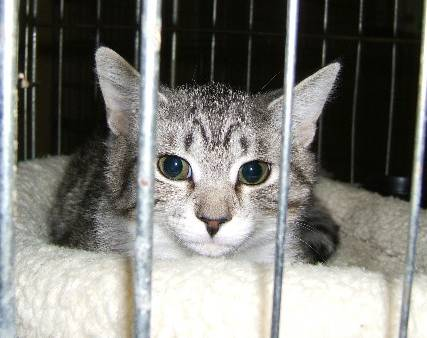

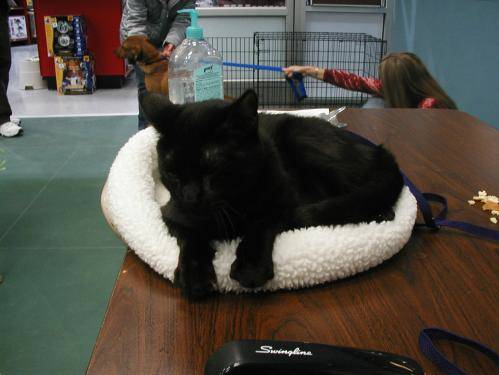

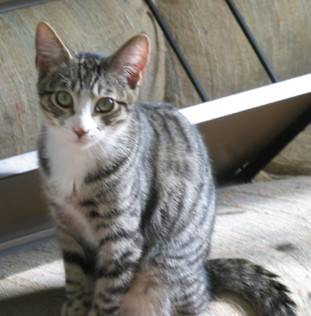

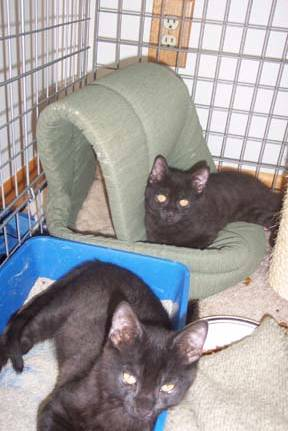

In [ ]:
from google.colab.patches import cv2_imshow

random_images_0 = random.sample(tr_0 , 5)

for img_path in random_images_0:
    img = cv2.imread(os.path.join(training_path,'cat',img_path))
    cv2_imshow(img)

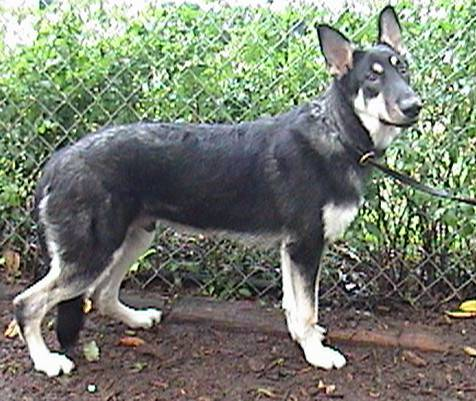

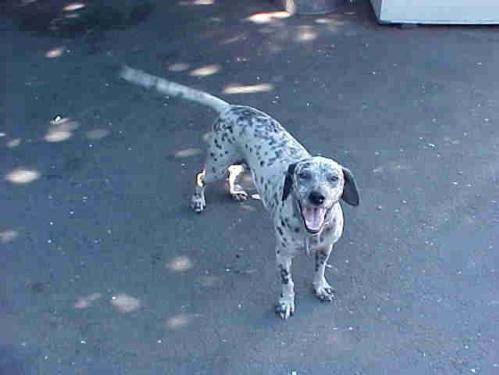

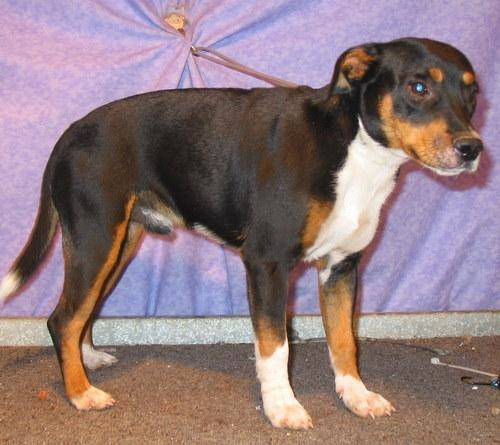

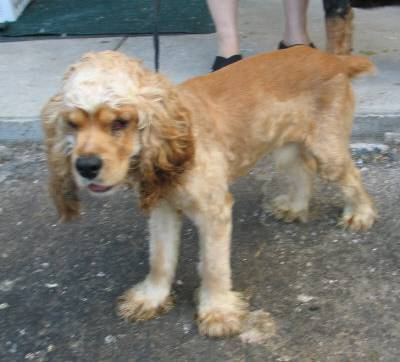

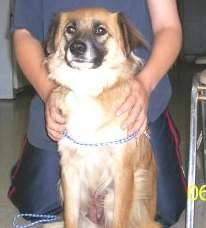

In [ ]:
random_images_1 = random.sample(tr_1 , 5)

for img_path in random_images_1:
    img = cv2.imread(os.path.join(training_path,'dog',img_path))
    cv2_imshow(img)

#Data preparation using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target image size and the number of classes
target_size = (250, 250)

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Create the train and validation generators
train_generator = datagen.flow_from_directory(
    'my_data/train',
    target_size=target_size,
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'my_data/val',
    target_size=target_size,
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    'my_data/test',
    target_size=target_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


#Modeling

##Only CNN (customized model)

###Model creation and training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,AveragePooling2D


#Define the model
def create_model():

  model = Sequential()

  model.add(Conv2D(20, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3), padding='same'))
  model.add(AveragePooling2D())
  model.add(Conv2D(24, (3, 3), activation='relu', padding='same'))
  model.add(AveragePooling2D())
  model.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
  model.add(AveragePooling2D())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC' ,tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

  return model


#Create the model
model = create_model()

we can see the performance of our model is excellent on both training and validation data !

In [ ]:
history = model.fit(train_generator , epochs=20 , validation_data=val_generator)

Epoch 1/20
235/235 [==============================] - 91s 336ms/step - loss: 0.6437 - accuracy: 0.6179 - auc: 0.6703 - precision: 0.6142 - recall: 0.6341 - val_loss: 0.5977 - val_accuracy: 0.6778 - val_auc: 0.7614 - val_precision: 0.7647 - val_recall: 0.5136
Epoch 2/20
235/235 [==============================] - 64s 271ms/step - loss: 0.5530 - accuracy: 0.7105 - auc: 0.7884 - precision: 0.7272 - recall: 0.6736 - val_loss: 0.4767 - val_accuracy: 0.7848 - val_auc: 0.8692 - val_precision: 0.8098 - val_recall: 0.7444
Epoch 3/20
235/235 [==============================] - 66s 280ms/step - loss: 0.4862 - accuracy: 0.7645 - auc: 0.8465 - precision: 0.7713 - recall: 0.7520 - val_loss: 0.4224 - val_accuracy: 0.8076 - val_auc: 0.8917 - val_precision: 0.8201 - val_recall: 0.7880
Epoch 4/20
235/235 [==============================] - 68s 288ms/step - loss: 0.4227 - accuracy: 0.8033 - auc: 0.8872 - precision: 0.8095 - recall: 0.7932 - val_loss: 0.3387 - val_accuracy: 0.8512 - val_auc: 0.9360 - val_pre

In [ ]:
#save the model weights
model.save_weights('model_weights.h5')

#LOAD THE WEIGHTS
# model.load_weights('model_weights.h5')

###Testing the model

157/157 [==============================] - 15s 89ms/step
CNN_Precision: 0.9976019184652278
CNN_Recall: 0.9984
157/157 [==============================] - 12s 75ms/step - loss: 0.0070 - accuracy: 0.9980 - auc: 1.0000 - precision: 0.9976 - recall: 0.9984


<Axes: >

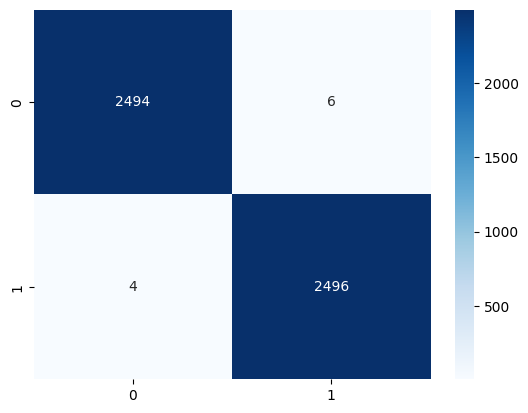

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = model.predict(test_generator)
y_predictions = np.where(y_pred > 0.5, 1, 0)

# Calculate precision, recall
precision_cnn = precision_score(test_generator.labels, y_predictions)
recall_cnn = recall_score(test_generator.labels, y_predictions)

print("CNN_Precision:", precision_cnn)
print("CNN_Recall:", recall_cnn)


test_results = model.evaluate(test_generator)

true_labels = test_generator.labels

cm = confusion_matrix(true_labels,y_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
#Define a resizing function to use for singular image prediction
def resize(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (250, 250))
  img = np.expand_dims(img, axis=0)
  return img

pred_1 = model.predict(resize('./cat/cat.10.jpg')).flatten()[0]
pred_2 = model.predict(resize('./dog/dog.10004.jpg')).flatten()[0]

classes = {0:'cat', 1: 'dog'}
print(classes[pred_1] ,'\n', classes[pred_2] , sep='')


1/1 [==============================] - 0s 29ms/step
dog
dog


##Transfer learning to SVM classifier

In [ ]:
#Creating a new model that outputs the features from the second-to-last layer in our pretrained model
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [ ]:
#Extracting features from the train, validation and test sets
tr_features = feature_extractor.predict(train_generator)
va_features = feature_extractor.predict(val_generator)
te_features = feature_extractor.predict(test_generator)

print(type(tr_features))


157/157 [==============================] - 13s 80ms/step
<class 'numpy.ndarray'>


Now each 'features' is a NumPy array containing the extracted features we can feed this into your SVM model

In [ ]:
print(tr_features.shape)
print(va_features.shape)
print(te_features.shape)

(15000, 64)
(5000, 64)
(5000, 64)


###Using pandas for more understandle data manipulation

In [ ]:
#Since SVM does not take validation data so we'll it the train+val data for training
df = pd.DataFrame(np.concatenate((tr_features, va_features), axis=0))

#getting the label column from the generators
df['label'] = np.concatenate((train_generator.labels , val_generator.labels) , axis=0)

#Sorting the data by label so we split them between cats and dogs consecutively
df_sorted = df.sort_values('label')

print(df_sorted.shape)
df_sorted.head()



(20000, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.000000,3.210777,0.000000,1.135247,2.058276,3.480689,2.363703,1.469204,0.395180,0.989794,...,1.795169,0.000000,0.0,0.0,0.972149,0.000000,2.979075,0.000000,0.107548,0
6663,4.056264,0.425624,6.127866,0.024818,0.000000,0.665080,4.836413,0.000000,0.213291,0.000000,...,1.130225,0.000000,0.0,0.0,4.159527,3.585380,0.000000,3.650300,0.000000,0
6664,0.467871,1.716762,0.000000,0.716550,1.855900,1.523554,0.000000,1.957336,0.730062,0.000000,...,1.918959,1.385003,0.0,0.0,0.000000,0.000000,1.233363,0.000000,0.930102,0
6665,0.000000,3.524181,0.000000,3.592579,2.235654,1.625223,1.375377,4.547495,4.166462,0.000000,...,1.059875,1.814679,0.0,0.0,0.000000,0.000000,0.000000,0.783904,0.332174,0
6666,1.268576,0.547816,3.001411,0.471227,0.045500,0.442719,2.006629,1.058165,1.297438,0.000000,...,0.560296,0.872284,0.0,0.0,2.439537,2.080338,0.000000,1.766834,0.000000,0


###feed svm the features

In [ ]:
from sklearn import svm

X = df_sorted.drop('label', axis=1)
y = df_sorted['label']



In [ ]:
# Creating an SVM classifier
svm_model = svm.SVC()

# Fitting the SVM model to the extracted features and true labels
svm_model.fit(X, y)

# Saving the trained model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
# Loading the trained SVM model from the file
# svm_model = pickle.load(open('svm_model.pkl', 'rb'))


# Using the loaded model to make predictions on the test features
y_pred_svm = svm_model.predict(te_features)

# Evaluating the SVM model's performance
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(test_generator.labels, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.9978


SVM Precision: 0.9972033559728326
SVM Recall: 0.9984


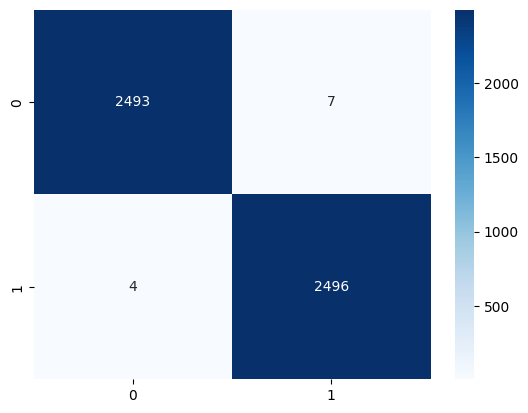

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

#Calculating precision, recall
precision_svm = precision_score(test_generator.labels, y_pred_svm)
recall_svm = recall_score(test_generator.labels, y_pred_svm)

print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)

#Confusion matrix
cm_svm = confusion_matrix(test_generator.labels, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.show()


We can see that it gives a similar performance as using only CNN. So we can simply give this method up.